# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset.

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install statsmodels 

In [3]:
# !pip install statsmodels

In [4]:
# !pip install imblearn

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [2]:
# !pip install scikitplot

In [3]:
from sklearn.metrics import RocCurveDisplay

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:












- Are there any missing values in the dataset?

In [4]:
# colab:
# data = pd.read_csv('/content/drive/MyDrive/0.Bootcamp/1. Data Course/lighthouse-data-notes/Week_20/Project/ml-project-supervised-learning/diabetes.csv')

# jl
data = pd.read_csv('diabetes.csv')


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isna().sum()
# no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
col_names = data.columns.values.tolist()
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
# for col in col_names:
    # print('COLUMN :', col, '\n',data[col].value_counts())

- How are the predictor variables related to the outcome variable?

In [9]:
# seperate predictor (X) variables from the outcome/target (Y) variable
y = data['Outcome']
X = data.drop('Outcome', axis = 1)


In [10]:
features = X.columns.values.tolist()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                             Results: Logit
Model:                 Logit              Method:             MLE       
Dependent Variable:    Outcome            Pseudo R-squared:   0.059     
Date:                  2023-10-27 11:37   AIC:                950.6528  
No. Observations:      768                BIC:                987.8031  
Df Model:              7                  Log-Likelihood:     -467.33   
Df Residuals:          760                LL-Null:            -496.74   
Converged:             1.0000             LLR p-value:        2.5825e-10
No. Iterations:        5.0000             Scale:              1.0000    
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1284   0.0286  4.4843 0

No significant relationship between Outcome and:

* Skin Thickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age


In [12]:
# drop skin thickness from model and run again, iteratively,
type(X)
X_bws = X.copy()
X_bws = X_bws.drop(['SkinThickness', 'BMI', 'Insulin', 'DiabetesPedigreeFunction'], axis = 1)
X_bws

,Pregnancies,Glucose,BloodPressure,Age
0,6,148,72,50
1,1,85,66,31
2,8,183,64,32
3,1,89,66,21
4,0,137,40,33
...,...,...,...,...
763,10,101,76,63
764,2,122,70,27
765,5,121,72,30
766,1,126,60,47


In [13]:
# best model using backward selection. 
logit_model=sm.Logit(y,X_bws)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.610634
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Outcome          Pseudo R-squared: 0.056     
Date:               2023-10-27 11:37 AIC:              945.9335  
No. Observations:   768              BIC:              964.5086  
Df Model:           3                Log-Likelihood:   -468.97   
Df Residuals:       764              LL-Null:          -496.74   
Converged:          1.0000           LLR p-value:      5.2394e-12
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.1244   0.0284  4.3757 0.0000  0.0687  0.1801
Glucose            0.0140   0.0023  6.0801 0.0000  0.0095  0.0185


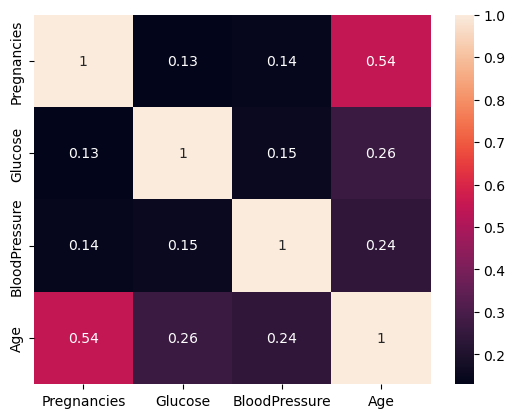

In [14]:
corr_matrix = X_bws.corr()
# heatmap of all correlations with 'best' features 
sns.heatmap(corr_matrix, annot=True)
plt.show()

- What is the correlation between the predictor variables?

In [15]:
corr_matrix = X.corr()


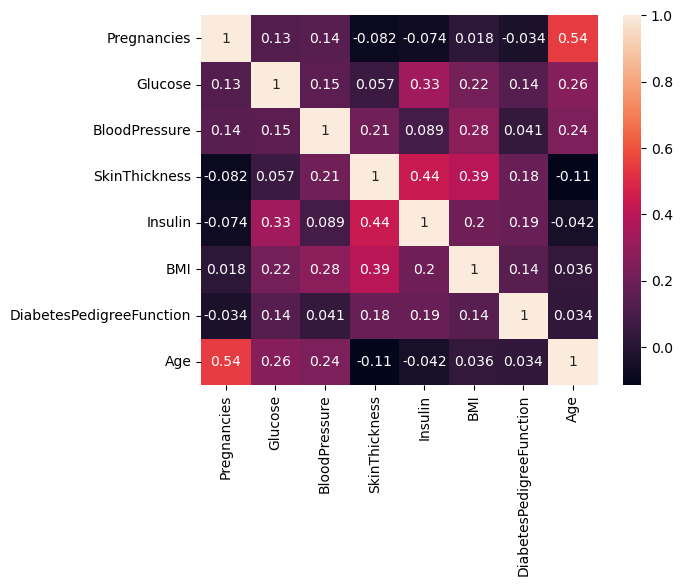

In [16]:
# heatmap of all correlations
sns.heatmap(corr_matrix, annot=True)
plt.show()

- What is the distribution of each predictor variable?


In [17]:
col_names = X.columns.tolist()

In [18]:
# for col in col_namesa

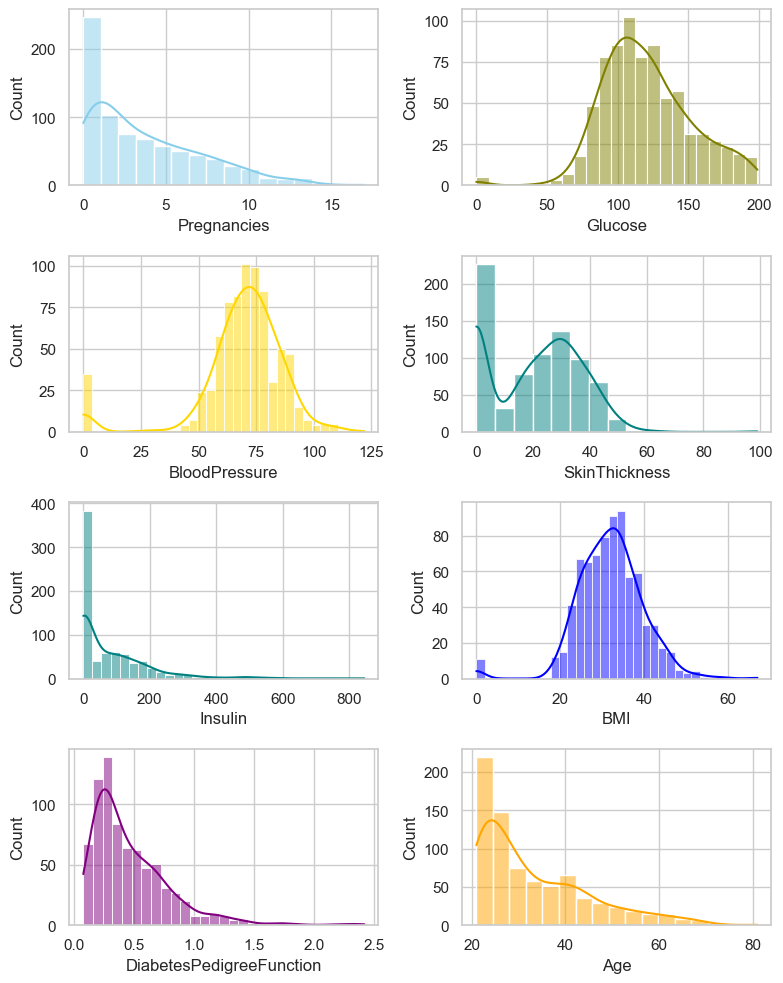

In [19]:

sns.set(style="whitegrid")
fig,axs = plt.subplots(4,2, figsize = (8,10))
sns.histplot(data=X, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X, x="Glucose", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X, x="BloodPressure", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=X, x="SkinThickness", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=X, x="Insulin", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=X, x="BMI", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=X, x="DiabetesPedigreeFunction", kde=True, color="purple", ax=axs[3,0])
sns.histplot(data=X, x="Age", kde=True, color="orange", ax=axs[3,1])

fig.tight_layout()

- Are there any outliers in the predictor variables?

**StudentAnswer:**
* some outliers in pregnancies
* glucose, bloodpressure

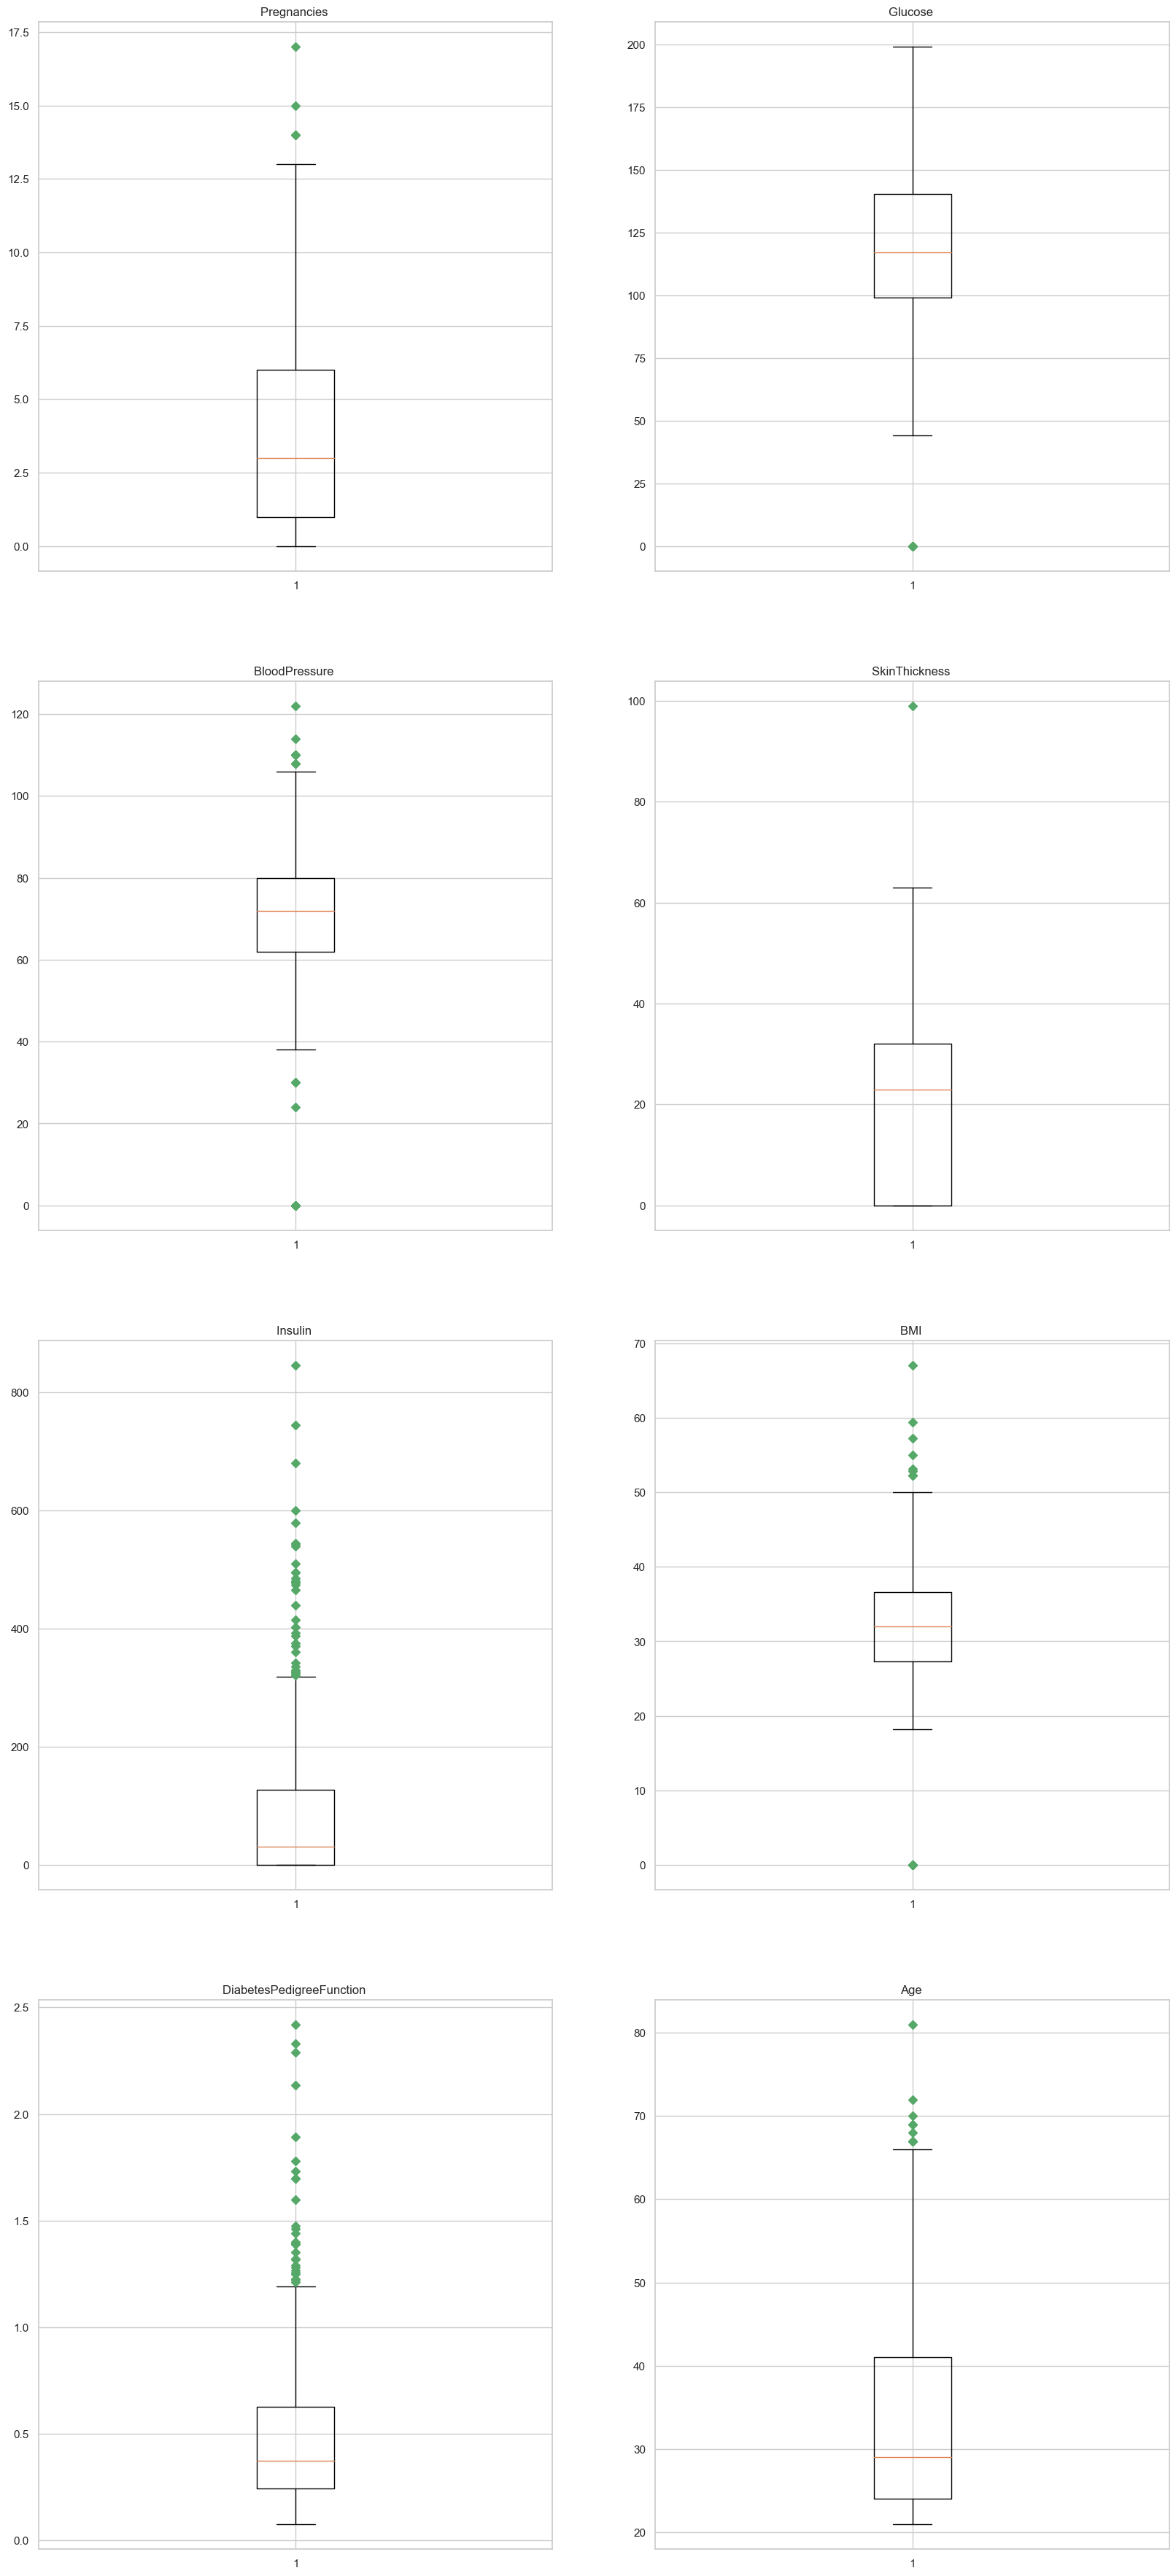

In [20]:
# Since the variables will all have different scales, plot each feature individually
fig, axs = plt.subplots(4,2,figsize=(20,45))
for row in range(4): # each subplot row
    for col in range(2): # each subplot column
        feature_name = col_names[row*2+col]
        axs[row,col].boxplot(data[feature_name], 0, 'gD')
        axs[row,col].set_title(f"{feature_name} ")
plt.show()


- How are the predictor variables related to each other?

In [21]:
all_columns = X.columns.tolist()
all_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

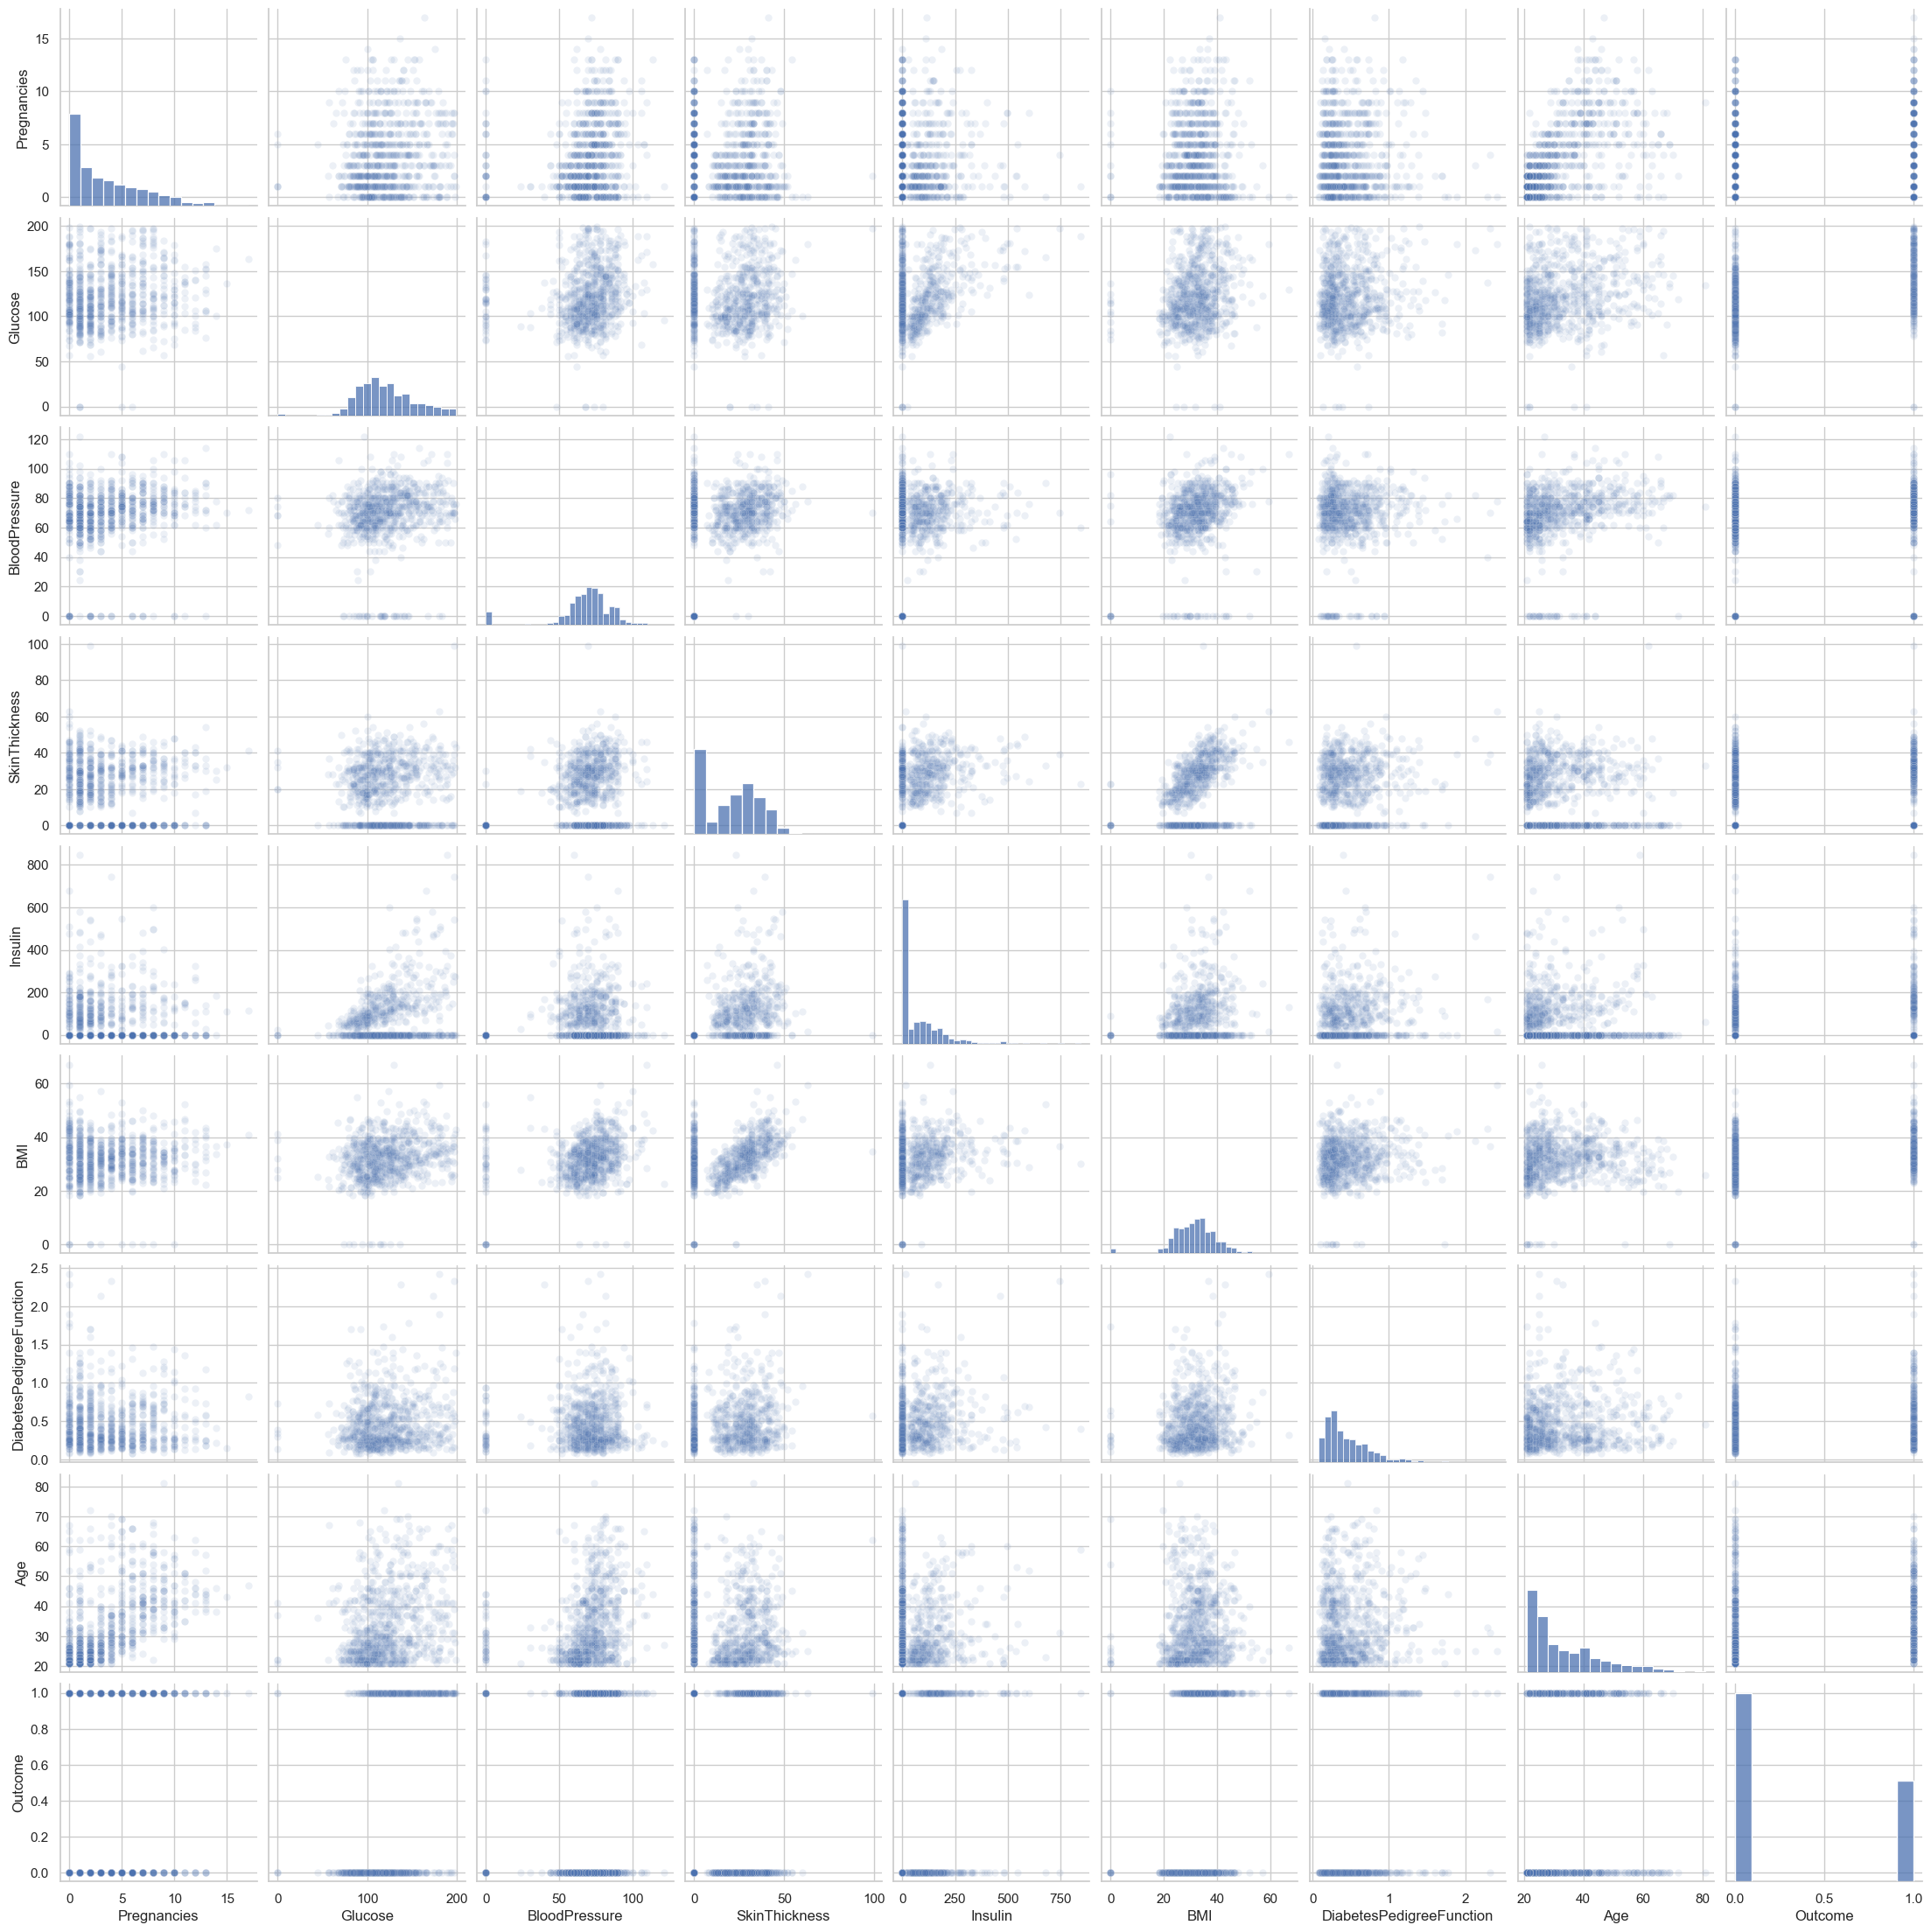

In [22]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.1})

After looking at the pair grid, plot some of the relationships that appear the most correlated. 
* Age and Insulin
* Glucose and Blood Pressure
* Skin thickness and BMI

<AxesSubplot: xlabel='Age', ylabel='Insulin'>

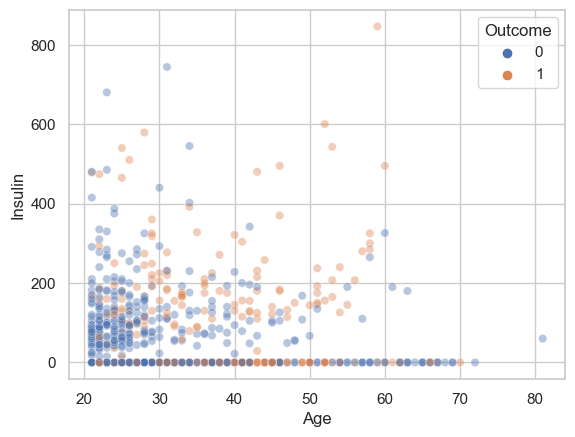

In [23]:
# 
sns.scatterplot(data=data, x='Age', y='Insulin', hue='Outcome', alpha = 0.4)

<AxesSubplot: xlabel='Glucose', ylabel='Insulin'>

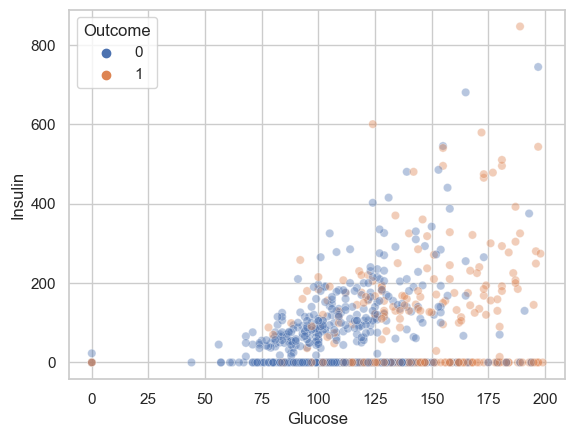

In [24]:
# random eda / QA
sns.scatterplot(data=data, x='Glucose', y='Insulin', hue='Outcome', alpha = 0.4)

<AxesSubplot: xlabel='SkinThickness', ylabel='BMI'>

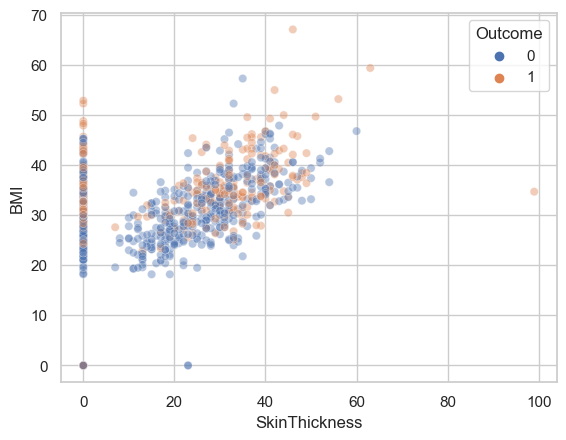

In [25]:
# random eda / QA
sns.scatterplot(data=data, x='SkinThickness', y='BMI', hue='Outcome', alpha = 0.4)

<AxesSubplot: xlabel='SkinThickness', ylabel='Outcome'>

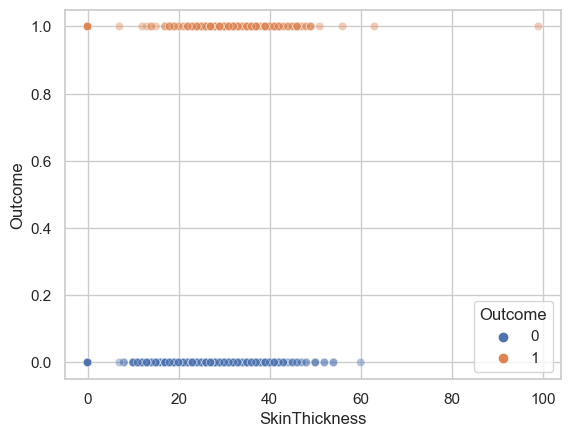

In [26]:
# random eda / QA
sns.scatterplot(data=data, x='SkinThickness', y='Outcome', hue='Outcome', alpha = 0.4)

- Is there any interaction effect between the predictor variables?

Referring the correlation matrix made earlier...

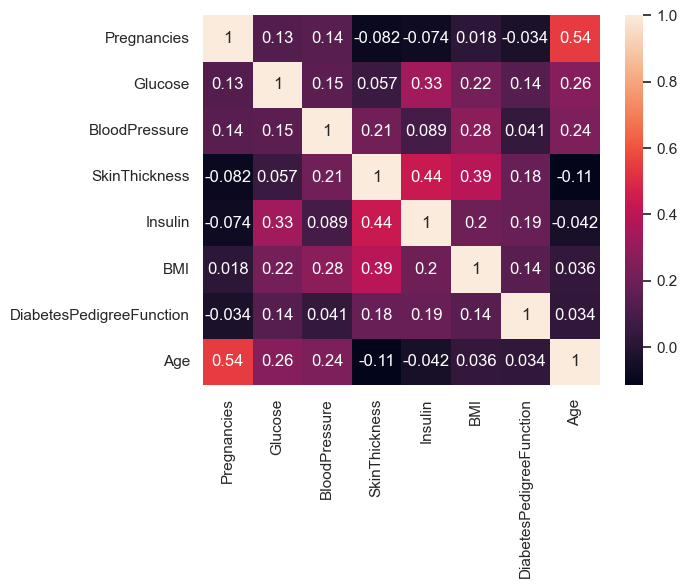

In [27]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

The highest correlation between predictor variables is 0.54 between age and pregnancies which is not high enough to make any changes to data.

- What is the average age of the individuals in the dataset?

In [28]:
data['Age'].mean()

33.240885416666664

- What is the average glucose level for individuals with diabetes and without diabetes?

In [29]:
# average for entire data set, out of curiosity
data['Glucose'].mean()

120.89453125

In [30]:
#average for individuals with diabetes

avg_glucose_disease = data.loc[data['Outcome'] ==1, 'Glucose'].mean()
avg_glucose_disease

141.25746268656715

In [31]:
#average for individuals without diabetes
avg_glucose_no_disease = data.loc[data['Outcome'] == 0, 'Glucose'].mean()
avg_glucose_no_disease

109.98

- What is the average BMI for individuals with diabetes and without diabetes?

In [32]:
# average for entire data set, out of curiosity
data['BMI'].mean()

31.992578124999998

In [33]:
#average for individuals with diabetes

avg_bmi_disease = data.loc[data['Outcome'] ==1, 'BMI'].mean()
avg_glucose_disease

141.25746268656715

In [34]:
#average for individuals without diabetes
avg_BMI_no_disease = data.loc[data['Outcome'] == 0, 'BMI'].mean()
avg_BMI_no_disease

30.3042

- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

In [35]:
all_columns = X.columns.tolist()
all_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

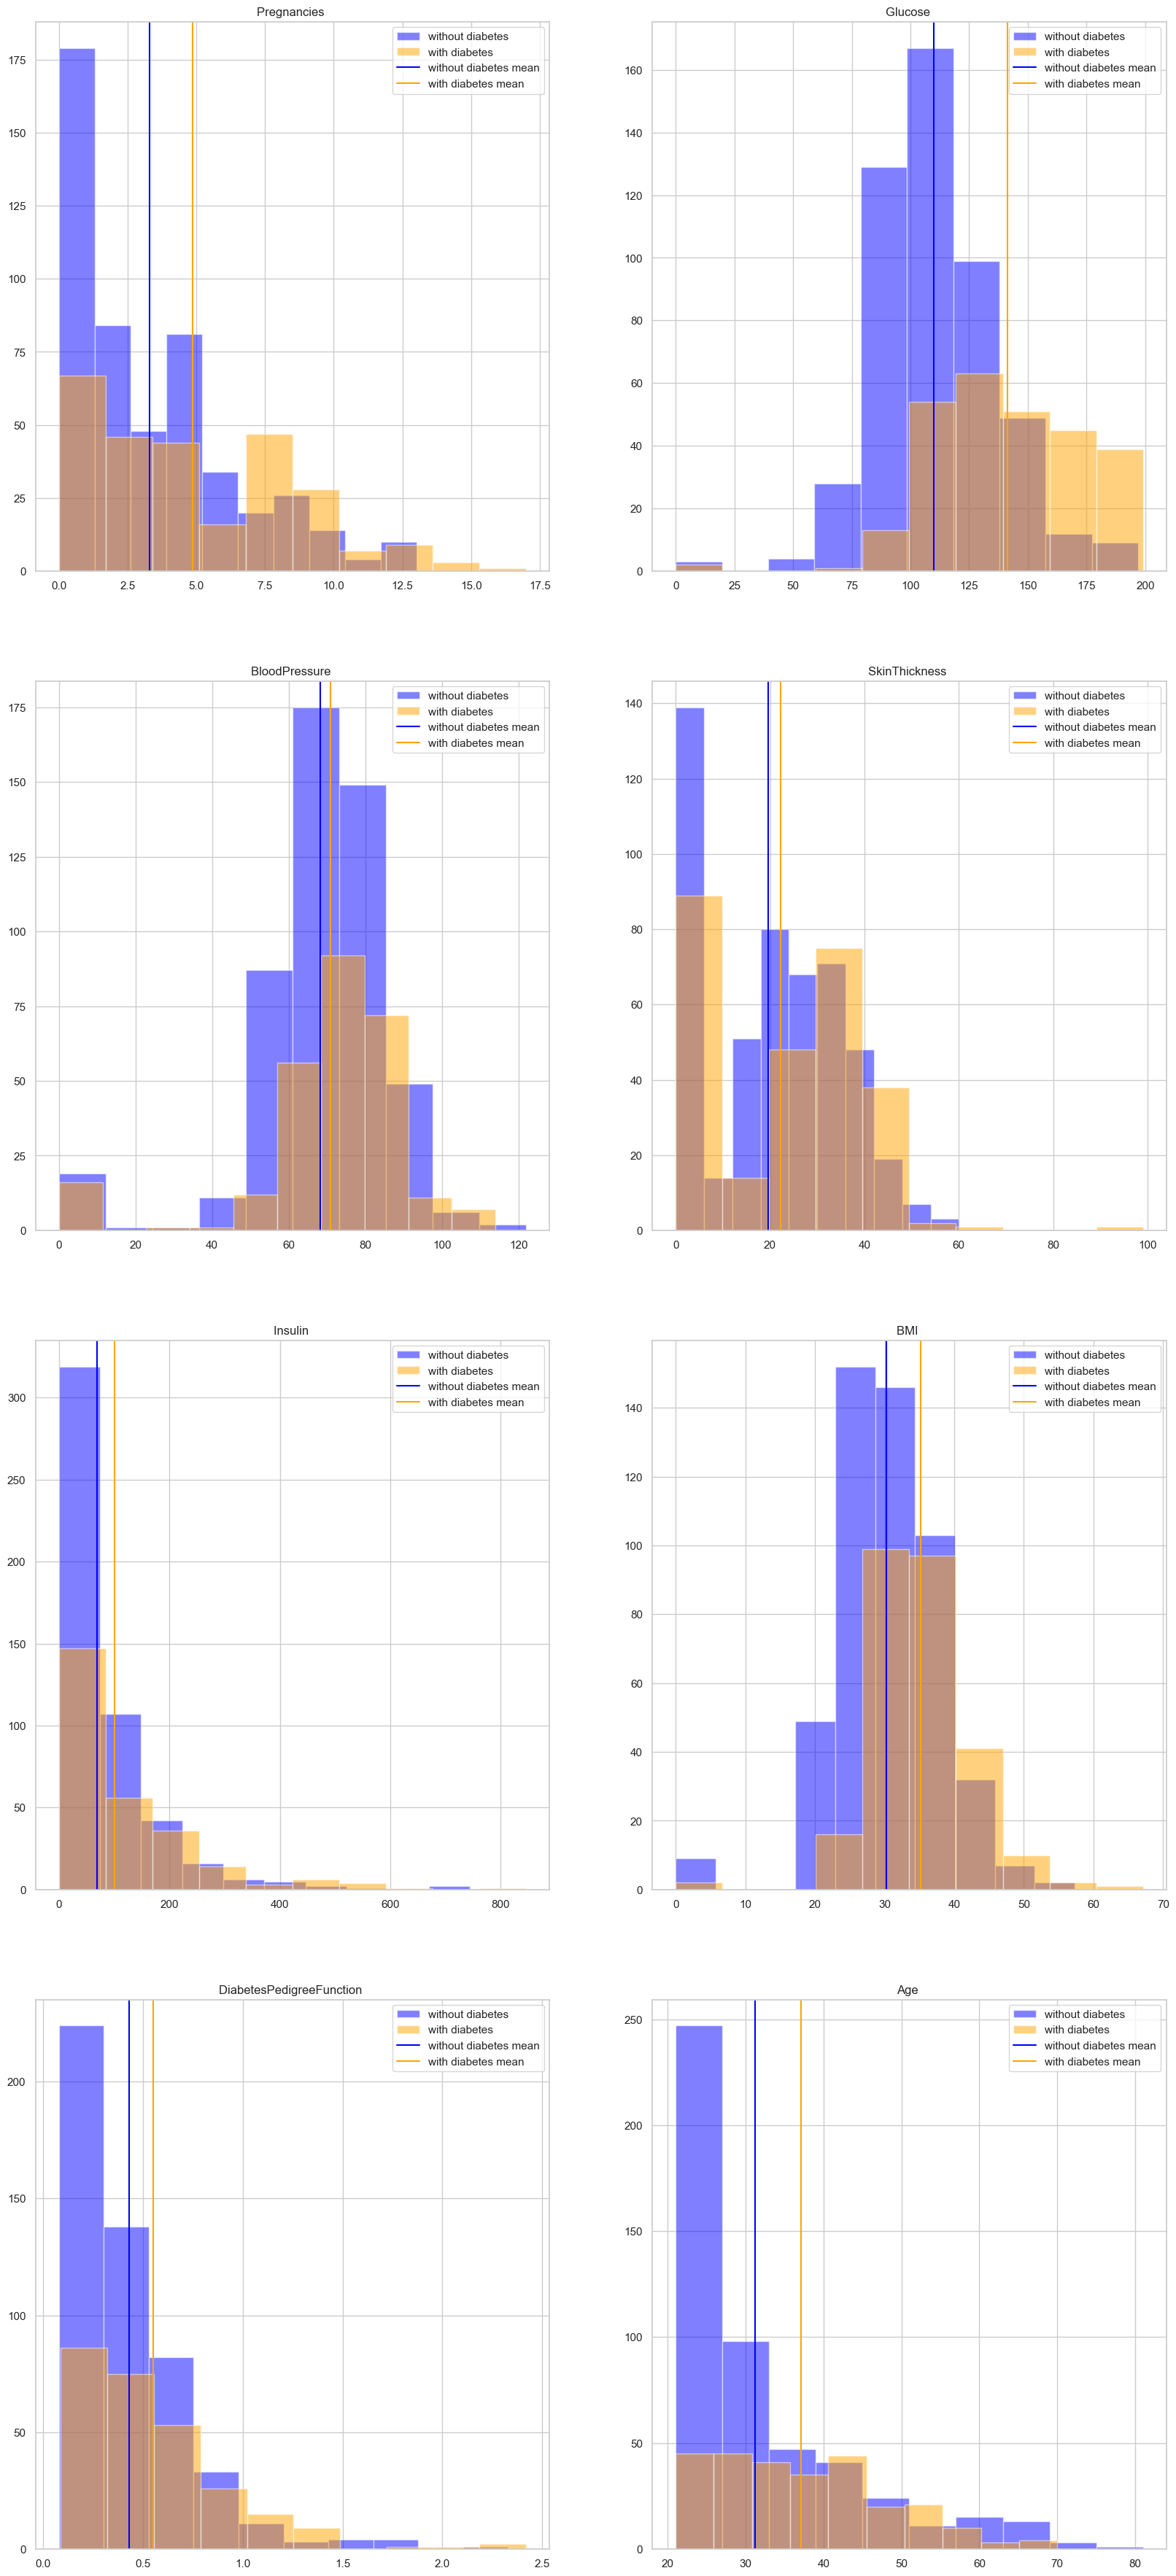

In [36]:
row = 0
col = 0
# feature = all_columns[row*2+col]
# print(feature)
fig, axs = plt.subplots(4,2,figsize=(20,45))
for row in range(4): # each subplot row
    for col in range(2): # each subplot column
        feature_name = all_columns[row*2+col]
        # print(feature_name, row, col)
        no_disease = data.loc[data['Outcome'] == 0, feature_name]
        with_disease = data.loc[data['Outcome'] == 1, feature_name]
        axs[row,col].hist(no_disease, alpha = 0.5, color='blue', label = 'without diabetes')
        axs[row,col].hist(with_disease, alpha = 0.5, color='orange',  label = 'with diabetes')
        axs[row,col].axvline(no_disease.mean(), color='blue', label = 'without diabetes mean')
        axs[row,col].axvline(with_disease.mean(), color='orange', label = 'with diabetes mean')
        axs[row,col].set_title(f"{feature_name} ")
        axs[row,col].legend()
# plt.legend()
plt.show()

- Are there any differences in the predictor variables between males and females (if gender information is available)?

*This information is not available in the data set. It would be unethical to make assumptions that if pregnancies >=0 == Female, otherwise Male. since Many of the records would be misclassified as Male if they had never had a pregnancy.*

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

## - Handling missing values


In [37]:
# check for missing values:

all_cols = data.columns.tolist()

for column in all_cols:
    missing_values = data[column].isna().sum()
    print(f"{column}: {missing_values}")


Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 0


In [38]:
#qa check for any other missing / null values
# for column in all_cols:
    # print(data[column].value_counts())

In [39]:
mean_BMI = data.loc[data['BMI'] != 0, ['BMI']].mean()
mean_BMI

BMI    32.457464
dtype: float64

In [40]:
median_BMI = data.loc[data['BMI'] != 0, ['BMI']].median()
median_BMI

BMI    32.3
dtype: float64

In [41]:
data['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [42]:
# replace rows where BMI = 0 with median BMI since this is impossible and number of records is minimal 
data=data.replace({'BMI': {0: median_BMI}}) 
print (data["BMI"].value_counts())

32.3    14
32.0    13
31.6    12
31.2    12
33.3    10
        ..
22.7     1
45.4     1
24.9     1
42.0     1
46.3     1
Name: BMI, Length: 247, dtype: int64


## Handling outliers


In [43]:
data.iloc[:,[2]]

,BloodPressure
0,72
1,66
2,64
3,66
4,40
...,...
763,76
764,70
765,72
766,60


In [44]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [45]:
Q1

Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.50000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

In [46]:
IQR

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.1000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [47]:
outliers = pd.DataFrame(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

In [48]:
outliers['count'] = outliers

In [49]:
outliers.columns

Index([0, 'count'], dtype='object')

In [50]:
outliers = outliers.drop(columns=[0])

In [51]:
outliers['num_rows'] = len(data)

In [52]:
outliers['percent'] =  outliers['count'] / outliers['num_rows']
outliers.sort_values(by='percent', ascending = False)

,count,num_rows,percent
BloodPressure,45,768,0.058594
Insulin,34,768,0.044271
DiabetesPedigreeFunction,29,768,0.037760
Age,9,768,0.011719
BMI,8,768,0.010417
Glucose,5,768,0.006510
Pregnancies,4,768,0.005208
SkinThickness,1,768,0.001302
Outcome,0,768,0.000000


In [53]:
IQR
# pd.DataFrame(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.1000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [54]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
# for index in range(len(data.axes[1])):
#   print(IQR[index])
#   feature_outs = pd.DataFrame(data[(data.iloc[:,index] < (Q1[index].item() - 1.5 * IQR[index].item()) | (data.iloc[:,index].item()  > (Q3[index] + 1.5 * IQR[index])))])
#   print(feature_outs)
#   break
#   # feature_outs = pd.DataFrame(data.iloc[:,index] < (Q1[index] - 1.5 * IQR[index])) | (data.iloc[:,index]  > (Q3[index] + 1.5 * IQR[index]))
#   # print(feature_outs)

In [56]:
index= 0
data.iloc[:,index].name

'Pregnancies'

In [57]:
columns = data.columns.tolist()
columns.append('outlier_col')
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'outlier_col']

In [58]:
# outliers...skipping taking too long to figure out
#intention was to have a dataframme with all outliers for each feature and see
# if I could find any patterns that would tell me if the outliers could be removed or not

# leaving code that returns an error to show the work done. I think it's a parantheses issue.

df_outliers = pd.DataFrame(columns = columns)
df_outliers
for index in range(len(data.axes[1])):
  q1_bound = ((Q1[index].item() - 1.5 * IQR[index].item()))
  q3_bound = ((Q3[index].item() + 1.5 * IQR[index].item()))
  feat_out = data.copy()
  feat_out = data[(data.iloc[:,index] < q1_bound) | (data.iloc[:,index]  > q3_bound)]
  outlier_col_name = data.iloc[:,index].name
  feat_out.loc[:]['outlier_col'] = outlier_col_name
  pd.concat([df_outliers, feat_out])

In [59]:
df_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier_col


## Scaling and normalization


In [60]:
# Scale features since weight magnitudes will effect regularization weight penalties
X_scaled = StandardScaler().fit_transform(X)
# y_scaled = StandardScaler().fit_transform(y) # don't understand error

## Feature Engineering


In [61]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


## Handling imbalanced data

In [63]:
# check proportion of 0 outcome and 1 outcome
data['Outcome'].value_counts()

# more 0 outcomes than 268 outcomes, need to oversample from class 1, to get balanced data

0    500
1    268
Name: Outcome, dtype: int64

In [64]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Preprocessing

In [65]:
X, y = shuffle(X_scaled, y, random_state=27) #

In [66]:
# since we  have under 10000 records, I will oversample the minority class so that it is balanced with the majority
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [67]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_scaled, y)

# use X over and Y OVer in ML
print(X_over.shape)
print(y_over.shape)



(1000, 8)
(1000,)


In [68]:
# QA confirm classes are balanced
y_over.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [69]:
# Make train/test split
# Use 70% of the data for training and evaluate on the remaining 30%
train_ratio = 0.7

# IMPORTANT because shuffled first can take first 70% without bias,
X_train, X_test = X[:int(train_ratio * len(X))], X[int(train_ratio * len(X)):]
y_train, y_test = y[:int(train_ratio * len(y))], y[int(train_ratio * len(y)):]

print(f'{len(X_train)} training samples and {len(X_test)} test samples')

537 training samples and 231 test samples


## Singluar Model

### Model Training - Logistic Regression

In [70]:
500/768


0.6510416666666666

In [71]:
#balance the classess using the class weight param
clf = LogisticRegression(class_weight = {0: 500/768, 1:1-(500/768)}) 
# training the model
clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.6510416666666666, 1: 0.34895833333333337})

In [72]:
# Predicting the output

y_pred = clf.predict(X_test)

### Model Evaluation

Recap: </br>
*The model got the prediction "right", 2 ways* </br>
* True Positive: Model Predicted Positive & Train Actual is Positive
* True Negative: Model Predicted Negative & Train Actual is Negative

*The model got the prediction "wrong", 2 ways* </br>
* False Positive: Model Predicted Positive but Train Actual is Negative 
* False Negative: Model Predicted Negative but Train Actual is Positive

[image](https://miro.medium.com/v2/resize:fit:797/0*JpiWBlOFqYTPa8Ta.png)


![Waterfall](https://miro.medium.com/v2/resize:fit:797/0*JpiWBlOFqYTPa8Ta.png)

![confusionmatmeme](https://miro.medium.com/v2/resize:fit:924/format:webp/1*7EYylA6XlXSGBCF77j_rOA.png)

* accuracy </br>
Percentage of times the model "got it right"

accuracy = correct_predictions / total_predictions

In [73]:
# Computing the accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.59%


Text(0.5, 1.0, 'Confusion Matrix')

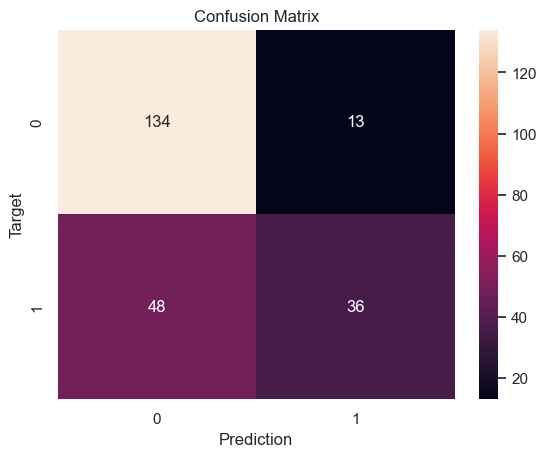

In [74]:
# confusion matrix
cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True,fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

Confusion Matrix Results:

(Prediction 0, Target 0) - True Negative
* Number of times the model **correctly predicted** someone **didn't**have diabetes
= 134

(Prediction 1, Target 1) - True Positive
* Number of times the model **correctly predicted** someone **did** have diabetes
= 36

(Prediction 0, Target 1) - False Positive
* Number of times the model **incorrectly predicted** that someone had diabetes when they actually didn't have diabetes
= 48
(Prediction 1, Target 0) - False Negative
* Number of times the model **incorrectly predicted** that someone didn't have diabetes when they actually did have diabetes
= 13

* precision

Precision measures the model's ability to correctly predict the positive class, the those with diabetes (Outcome = 1) 

* Number of times the model **correctly predicted** someone **did** have diabetes divided by all the times it predicted having diabetes 

Precision = TP / (TP + FP)

In [75]:
precision = precision_score(y_test, y_pred)
print("precision: {:.2f}%".format(precision * 100))

precision: 73.47%


* recall
Recall = (TP)/(TP+FN)
* from all who actually had the disease, how many did the model correctly predict? 

* Number of times the model **correctly predicted** someone **did** have diabetes divided by all the times someone actually had diabetes. 


In [76]:
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

Recall: 42.86%


**Why is precision higher than recall?**

Precision is higher than recall in this case because it incorrectly predicted someone having diabetes 48 times, compared to 36 correct predictions of diabetes. Recall completely ignores the "0" class, and only looks at how many times it correctly predicted 1. In the end it incorrectly predicted someone having diabetes more often than correctly. 

36/(36+48)

What is F1 score?
* Since precision is high and recall is low, use the F1 score. 
* considers precision and recall together.

* F1

In [77]:
fone = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(fone * 100))

F1 Score: 54.14%


* ROC-AUC

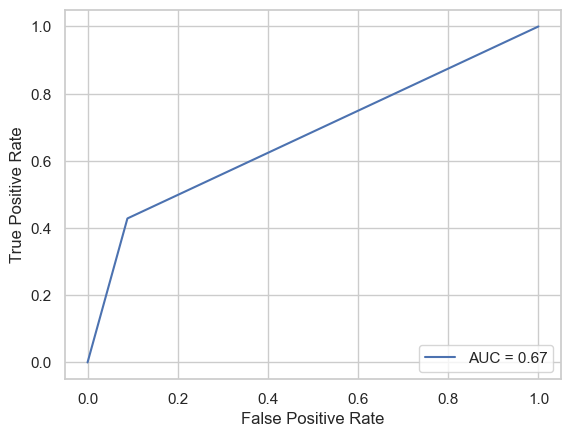

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [79]:
lr_results = classification_report(y_test, y_pred, labels=[0,1], target_names = ['0 - no diabetes', '1 - with diabetes'])
print(lr_results)

                   precision    recall  f1-score   support

  0 - no diabetes       0.74      0.91      0.81       147
1 - with diabetes       0.73      0.43      0.54        84

         accuracy                           0.74       231
        macro avg       0.74      0.67      0.68       231
     weighted avg       0.74      0.74      0.72       231



## b. Ensemble Model (Random Forest)

### Model Training  using defaults

In [80]:
rfc = RandomForestClassifier(random_state=0, class_weight = {0: 500/768, 1:1-(500/768)})

In [81]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.6510416666666666,
                                     1: 0.34895833333333337},
                       random_state=0)

In [82]:
# predict the test set resultss

y_pred = rfc.predict(X_test)

### Model Evaluation

In [83]:
rf_results = classification_report(y_test, y_pred, labels=[0,1], target_names = ['0 - no diabetes', '1 - with diabetes'])
print(rf_results)

                   precision    recall  f1-score   support

  0 - no diabetes       0.77      0.81      0.79       147
1 - with diabetes       0.64      0.58      0.61        84

         accuracy                           0.73       231
        macro avg       0.70      0.70      0.70       231
     weighted avg       0.72      0.73      0.72       231



Text(0.5, 1.0, 'Confusion Matrix')

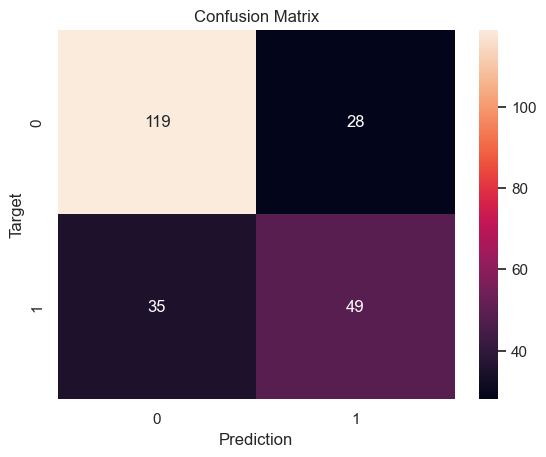

In [84]:
# confusion matrix
cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True,fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

* accuracy

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy score with default 100 decision-trees: {:.2f}%".format(accuracy * 100))


Model accuracy score with default 100 decision-trees: 72.73%


* precision

In [86]:
precision = precision_score(y_test, y_pred)
print("Model precision score with default 100 decision-trees: {:.2f}%".format(precision * 100))

Model precision score with default 100 decision-trees: 63.64%


* recall

In [87]:
recall = recall_score(y_test, y_pred)
print("Model recall score with default 100 decision-trees: {:.2f}%".format(recall * 100))

Model recall score with default 100 decision-trees: 58.33%


* F1

In [88]:
fone = f1_score(y_test, y_pred)
print("Model F1 score with default 100 decision-trees: {:.2f}%".format(fone * 100))

Model F1 score with default 100 decision-trees: 60.87%


* ROC-AUC

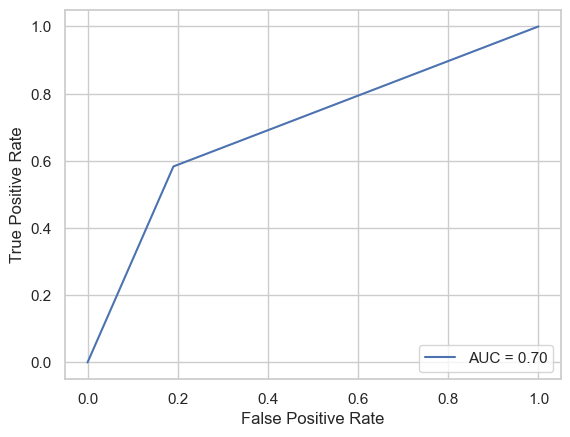

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [90]:
# grid search with random forrest

In [91]:
# grid search 

#### Optimize Random Forrest using grid search

In [92]:
# number of trees 
n_estimators =  n_estimators =  [10, 20, 50, 100, 200, 400, 500, 600, 700]
num_trees = n_estimators
# number of levels in one tree
max_depth =  [1, 5, 10, 20]

param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}

rf_Grid = GridSearchCV(estimator = rfc, param_grid = param_grid)

In [93]:
rf_Grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 0.6510416666666666,
                                                            1: 0.34895833333333337},
                                              random_state=0),
             param_grid={'max_depth': [1, 5, 10, 20],
                         'n_estimators': [10, 20, 50, 100, 200, 400, 500, 600,
                                          700]})

In [94]:
y_pred = rf_Grid.predict(X_test)

In [95]:
roc_auc_score(y_test, y_pred)

0.7100340136054422

Text(0.5, 1.0, 'Confusion Matrix')

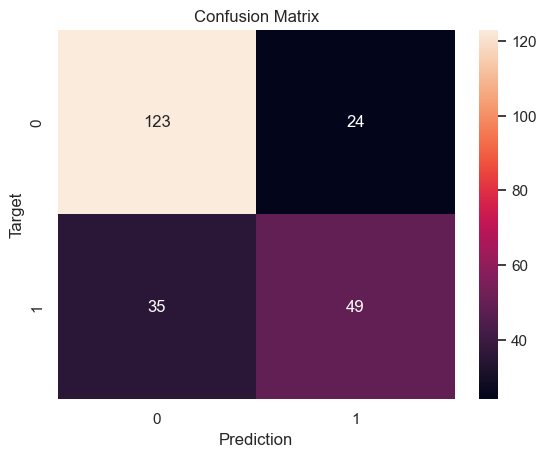

In [96]:
# confusion matrix
cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True,fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [97]:
rf_results_optimize = classification_report(y_test, y_pred, labels=[0,1], target_names = ['0 - no diabetes', '1 - with diabetes'])
print(rf_results_optimize)

                   precision    recall  f1-score   support

  0 - no diabetes       0.78      0.84      0.81       147
1 - with diabetes       0.67      0.58      0.62        84

         accuracy                           0.74       231
        macro avg       0.72      0.71      0.72       231
     weighted avg       0.74      0.74      0.74       231



In [98]:
best = rf_Grid.best_params_
print(type(best))

best_trees = best['n_estimators']

<class 'dict'>


In [99]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy score with optimized {} decision-trees: {:.2f}%".format(best_trees,accuracy * 100))


Model accuracy score with optimized 100 decision-trees: 74.46%


In [100]:
precision = precision_score(y_test, y_pred)
print("Model precision score with optimized {} decision-trees: {:.2f}%".format(best_trees, precision * 100))

Model precision score with optimized 100 decision-trees: 67.12%


In [101]:
recall = recall_score(y_test, y_pred)
print("Model recall score with optimized {} decision-trees: decision-trees: {:.2f}%".format(best_trees,recall * 100))

Model recall score with optimized 100 decision-trees: decision-trees: 58.33%


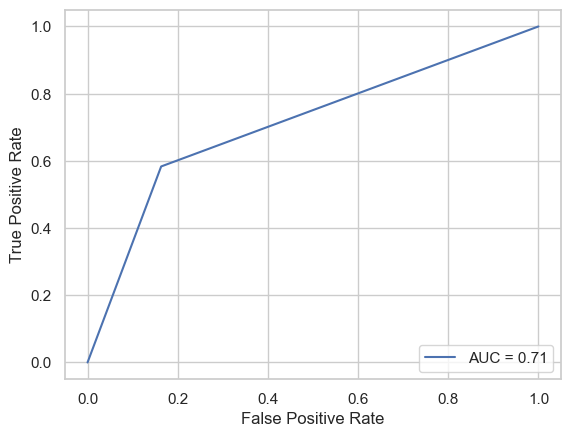

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [103]:
#Plots training error and testing error, using various amounts of trees in the random forest.
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier

    Parameters
    ----------
    X_train: numpy.ndarray
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set
    X_test: numpy.ndarray
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set
    num_trees: int
        The value for `n_estimators` argument of RandomForestClassifier
    Returns
    -------
        None
        Shows the number of trees vs error rate plot

    """
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestClassifier(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.show()

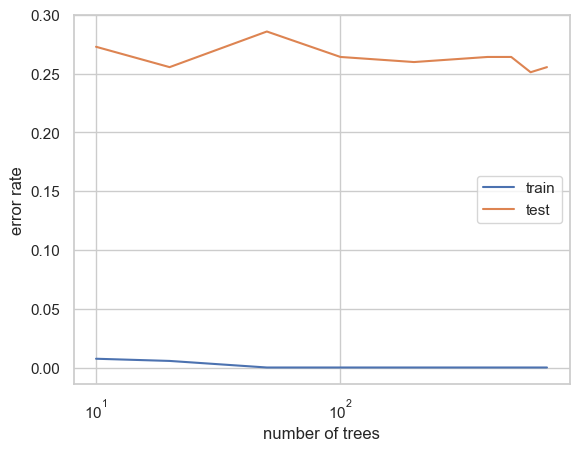

In [104]:
#fit a random forest for various n_estimators and plot the error
make_num_tree_plot(X_train, y_train, X_test, y_test, n_estimators)

## Comparison

In [105]:
# baseline logistic regression
print(lr_results)

                   precision    recall  f1-score   support

  0 - no diabetes       0.74      0.91      0.81       147
1 - with diabetes       0.73      0.43      0.54        84

         accuracy                           0.74       231
        macro avg       0.74      0.67      0.68       231
     weighted avg       0.74      0.74      0.72       231



In [106]:
# baseline random forrest
print(rf_results)

                   precision    recall  f1-score   support

  0 - no diabetes       0.77      0.81      0.79       147
1 - with diabetes       0.64      0.58      0.61        84

         accuracy                           0.73       231
        macro avg       0.70      0.70      0.70       231
     weighted avg       0.72      0.73      0.72       231



In [107]:
# optimized random forrest
print(rf_results_optimize)

                   precision    recall  f1-score   support

  0 - no diabetes       0.78      0.84      0.81       147
1 - with diabetes       0.67      0.58      0.62        84

         accuracy                           0.74       231
        macro avg       0.72      0.71      0.72       231
     weighted avg       0.74      0.74      0.74       231



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

**1. Finding 1: How to select the best model? And Which model is 'best'?**
* In this scenario, we want to favour the model that best predicts if someone has diabetes. More specifically, we want the model that best diagnoses diabetes correctly. We are less concerned about corectly predicting if someone does not have diabetes. Since Recall is the metric that measures how often the model correctly predicted that someone did have diabetes. The model with the highest recall value will be the 'best' model. In this case, the random forest model performed slightly beter than the logistic regression model. 
* A recall score of 58% indicates the model is decent at predicting diabetes. Coupled with a realistic accuracy score of 74%, the optimized Random Forest model performs well for our purposes. Though the baseline Random Forest performs nearly just as well</br>

**2. Finding 2: Why is precision higher than recall for Outcome = 1**</br>
* Precision is higher than recall in the logistic regression model for example because it incorrectly predicted someone having diabetes 48 times, compared to 36 correct predictions of diabetes. 
* Recall completely ignores the "0" class, and only looks at how many times it correctly predicted someone having diabetes. 
* In the end it incorrectly predicted someone having diabetes more often than correctly, which leads to a low recall. if Recall = 50% this would mean that it's can correctly predict that someone has diabetes and they actually have diabetes 50% of the time. The other 50% it predicts no diabetes when someone actually does have diabetes. 

**3. Finding 3 - "what is zero?"**</br>
* Although no missing values were found in the data. Due to low domain knowledge, It's unclear what the meaning of a "0" could be in the data set, and that these "0" may be missing values however would need a subject matter expert to confirm the validity of zeros in the  features like Insulin, Glucose, SkinThickness. I was able to assume that a BMI of zero was impossible and replace those records with the median value, hoever this didn't do much to change the results.

**4. Finding 4 : Room for improvement with optimization**</br>
* After performing optimization on Randmom forest, the best model came back almost identical to the baseline RandomForest model. Indicating that the models developped are already optimized since the results are not changing significantly. 

**5. Finding 5 : Age and Pregnancy**</br>
* Age and 